In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("quantitative_desc.csv")
sns.set_context("paper", font_scale=1.3);
sns.set_style("ticks");


reversed_data = data.iloc[::-1]
reversed_data.dropna(subset=['SMILES'], inplace=True)
reversed_data['Gen Num'] = [int(reversed_data['Generation'].iloc[i][1]) for i in range(len(reversed_data))]

print(len(reversed_data))

48403


In [22]:
#
exp_data = pd.read_csv('spectra/2017September21NegESI_39_Formose reaction_MeOH_Dual spray_Calmix_MIDAS.csv',
    #'2017September20NegESI_38_Dextrose_MeOH_Dual spray_Calmix_Sum100_MIDAS.csv',
                       skiprows=10, usecols=[0, 1, 2, 13, 14, 15, 17, 19, 21],
                       names=['#', 'Mass', 'Rel Abun', 'Molecular Formula', 'Carbon', 'nC', 'nH', 'nN', 'nO'])

#any(exp_data['5'].iloc[i] is not np.nan for i in range(len(exp_data)))
#exp_data['Molecular Formula'] = exp_data['Molecular Formula'].replace('No Hit', np.nan)
exp_data.dropna(inplace=True, subset=['nC'])
# NOTE: the following step of adding 1 to nH is important, due to it being negative ESI
exp_data['nH'] = exp_data['nH'] + 1
exp_data['H/C'] = exp_data['nH']/exp_data['nC']
exp_data['O/C'] = exp_data['nO']/exp_data['nC']
exp_data['log_abun'] = np.log10(exp_data['Rel Abun'])
exp_data

,#,Mass,Rel Abun,Molecular Formula,Carbon,nC,nH,nN,nO,H/C,O/C,log_abun
0,1,514.284397,68.8455,NaN,C,26.0,45.0,1.0,7.0,1.730769,0.269231,1.837876
1,2,276.059461,0.5320,*,C,13.0,12.0,NaN,6.0,0.923077,0.461538,-0.274088
2,3,290.075110,2.6118,*,C,14.0,14.0,NaN,6.0,1.000000,0.428571,0.416940
3,4,304.090759,6.3988,*,C,15.0,16.0,NaN,6.0,1.066667,0.400000,0.806099
4,5,318.106404,9.5062,*,C,16.0,18.0,NaN,6.0,1.125000,0.375000,0.978007
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,6119,719.340638,0.2726,NaN,C,37.0,56.0,2.0,8.0,1.513514,0.216216,-0.564474
8220,6122,659.135428,0.2708,*,C,42.0,28.0,NaN,4.0,0.666667,0.095238,-0.567351
8223,6125,593.230397,0.2680,#,C,31.0,36.0,NaN,10.0,1.161290,0.322581,-0.571865
8224,6126,173.081967,0.2626,NaN,C,8.0,14.0,NaN,4.0,1.750000,0.500000,-0.580705


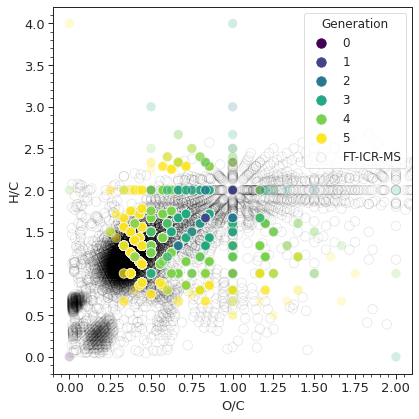

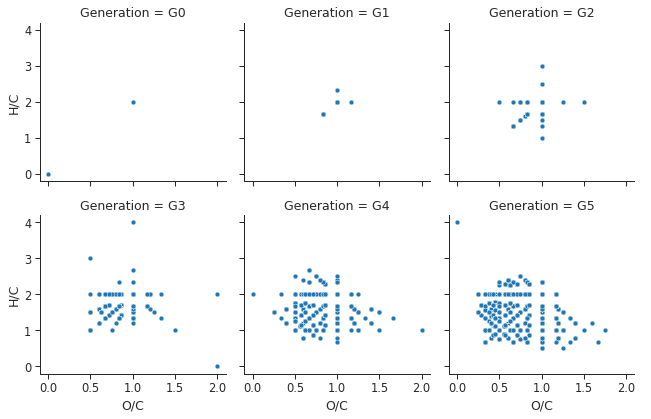

In [36]:
plt.figure(figsize=(6, 6));
#fig = px.scatter(reversed_data, x='O/C', y='H/C', color='Gen Num',
#                color_continuous_scale='Inferno_r')
#fig.show()

#sns.scatterplot(data=exp_data,
#               x='O/C', y='H/C', color='white', edgecolor='black', s=100)

# experimental
ax_exp = sns.scatterplot(data=exp_data, x='O/C', y='H/C', color='None', edgecolor='black',
                         alpha=0.1, s=90, label='FT-ICR-MS', legend='brief')

ax = sns.scatterplot(data=reversed_data,
                x = "O/C", y = "H/C",
                palette="viridis",
                #palette=['crimson', 'orange', 'yellow', 'g', 'dodgerblue', 'violet'],
                marker="o", size="Gen Num",
                sizes=(90, 90),
                #sizes=(90, 90),
                alpha=0.2,
                hue = "Gen Num",
                legend="full",
                );

#leg_labels = [f'G{n}' for n in range(6)].reverse()
h, l = ax.get_legend_handles_labels()
# the first item is 'ESI-FT-ICR-MS', I want to put that at the end.
hans = h[1:] + [h[0]]
labs = l[1:] + [l[0]]
ax.legend(fontsize = 12, \
              loc='upper right', \
               #bbox_to_anchor= (1.03, 0.9), \
               labels=labs, \
               handles=hans, \
               title="Generation", \
               title_fontsize = 12, \
               facecolor = 'white');

ax.minorticks_on()
ax.tick_params(axis='both', labelsize=13)
# Set title
plt.title('')
# Set x-axis label
plt.xlabel('O/C', fontsize=13);
# Set y-axis label
plt.ylabel('H/C', fontsize=13);

#plt.xscale('log');
#plt.yscale('log');
plt.ylim(-0.2, 4.2);
plt.xlim(-0.1, 2.1);
plt.tight_layout()
plt.savefig('van_krevlen_computed.png', dpi=300)
plt.show()
grid = sns.FacetGrid(data, col = "Generation", col_wrap=3, palette="rocket", height=3, aspect=1);
grid.map(sns.scatterplot, "O/C", "H/C");
grid.set_axis_labels("O/C", "H/C");
grid.add_legend()

,#,Mass,Rel Abun,Molecular Formula,Carbon,nC,nH,nN,nO,H/C,O/C,log_abun
0,1,514.284397,68.8455,NaN,C,26.0,44.0,1.0,7.0,1.692308,0.269231,1.837876
1,2,276.059461,0.5320,*,C,13.0,11.0,NaN,6.0,0.846154,0.461538,-0.274088
2,3,290.075110,2.6118,*,C,14.0,13.0,NaN,6.0,0.928571,0.428571,0.416940
3,4,304.090759,6.3988,*,C,15.0,15.0,NaN,6.0,1.000000,0.400000,0.806099
4,5,318.106404,9.5062,*,C,16.0,17.0,NaN,6.0,1.062500,0.375000,0.978007
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,6119,719.340638,0.2726,NaN,C,37.0,55.0,2.0,8.0,1.486486,0.216216,-0.564474
8220,6122,659.135428,0.2708,*,C,42.0,27.0,NaN,4.0,0.642857,0.095238,-0.567351
8223,6125,593.230397,0.2680,#,C,31.0,35.0,NaN,10.0,1.129032,0.322581,-0.571865
8224,6126,173.081967,0.2626,NaN,C,8.0,13.0,NaN,4.0,1.625000,0.500000,-0.580705


In [13]:
#f2 = plt.figure(figsize=(6,6))
import plotly.express as px
#ax2 = sns.scatterplot(
ax2 = px.scatter(exp_data,
               y='H/C', x='O/C', color='log_abun', color_continuous_scale='thermal_r')
ax2.show()
#ax2.set_xlim(-0.2, 3)
#ax2.set_ylim(-0.2, 3)

It is clear from the above output that the CSV contains G1 data at the top and G5 at the bottom. If you can reverse the order of the rows, that should do the job of plotting G5 dots first and G1 after that.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
